# 1. Introduction

### This analysis examines potential racial bias in the allocation of expenditures for individuals with developmental disabilities in Georgia. The dataset includes demographic and expenditure details for Hispanic and White non-Hispanic consumers. By analyzing expenditure distribution across different age cohorts, we aim to determine whether disparities exist and assess if there is evidence of discrimination in funding allocation.

# Step 1: Set Up Your Environment
### Import the necessary libraries:

In [ ]:
# Install libraries if not installed
!pip install pandas numpy matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Load the Dataset
### Upload your expenditure_data.csv to Google Colab

In [ ]:
# Load the dataset
df = pd.read_csv("expenditure_data.csv")

# Preview the dataset
df.head()


,Id,Age,Gender,Expenditures,Ethnicity
0,1,17,Female,2113,White not Hispanic
1,2,37,Male,41924,White not Hispanic
2,3,3,Male,1454,Hispanic
3,4,-19,Female,6400,Hispanic
4,5,13,Male,4412,White not Hispanic


# 2: Data Preprocessing
### A. Creating Age Cohort
Let's categorize the age groups into the required cohorts.

In [ ]:
# Function to Create Age Cohort
def age_cohort(age):
    if 0 <= age <= 5:
        return '0-5 years'
    elif 6 <= age <= 12:
        return '6-12 years'
    elif 13 <= age <= 17:
        return '13-17 years'
    elif 18 <= age <= 21:
        return '18-21 years'
    elif 22 <= age <= 50:
        return '22-50 years'
    elif age >= 51:
        return '51+ years'
    else:
        return np.nan

# Apply the Function
df['Age Cohort'] = df['Age'].apply(age_cohort)

# Preview the result
df.head()


,Id,Age,Gender,Expenditures,Ethnicity,Age Cohort
0,1,17,Female,2113,White not Hispanic,13-17 years
1,2,37,Male,41924,White not Hispanic,22-50 years
2,3,3,Male,1454,Hispanic,0-5 years
3,4,-19,Female,6400,Hispanic,NaN
4,5,13,Male,4412,White not Hispanic,13-17 years


# 3: Analysis and Research Questions
### A. Data Quality
### 1. Check for Missing  or Erroneous Values: Identify and remove rows with missing  or erroneous values.

In [ ]:
# Step 1: Check Missing Values
print("Missing Values:\n", df.isnull().sum())

# Step 2: Initial Shape (Number of Records Before Cleaning)
initial_shape = df.shape[0]
print(f"Number of Records Before Cleaning: {initial_shape}")

# Step 3: Drop Missing Values
df_cleaned = df.dropna()

# Step 4: Check for Negative Values
negative_age_count = (df_cleaned['Age'] < 0).sum()
negative_expenditure_count = (df_cleaned['Expenditures'] < 0).sum()

print(f"Negative Age Count: {negative_age_count}")
print(f"Negative Expenditure Count: {negative_expenditure_count}")

# Step 5: Remove Negative Values
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 0) & (df_cleaned['Expenditures'] >= 0)]

# Step 6: Number of Records After Cleaning
final_shape = df_cleaned.shape[0]
print(f"Number of Records After Cleaning: {final_shape}")

# Step 7: Number of Rows Deleted
rows_deleted = initial_shape - final_shape
print(f"Number of Rows Deleted: {rows_deleted}")
print("How many row did you delete" ,rows_deleted)

# Step 8: Check Missing Values After Cleaning
print("Missing Values After Cleaning:\n", df_cleaned.isnull().sum())

# Step 9: Final Dataset Shape
print("Dataset Shape After Removing Missing and Erroneous Values:", df_cleaned.shape)

Missing Values:
 Id              0
Age             0
Gender          5
Expenditures    0
Ethnicity       1
Age Cohort      4
dtype: int64
Number of Records Before Cleaning: 1000
Negative Age Count: 0
Negative Expenditure Count: 1
Number of Records After Cleaning: 989
Number of Rows Deleted: 11
How many row did you delete 11
Missing Values After Cleaning:
 Id              0
Age             0
Gender          0
Expenditures    0
Ethnicity       0
Age Cohort      0
dtype: int64
Dataset Shape After Removing Missing and Erroneous Values: (989, 6)


## Handle Outliers in Expenditure Columns
### 2. We will use the Interquartile Range (IQR) method to detect and remove outliers in the Expenditures columns.



In [ ]:
# Define a Function to Detect Outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

###i. Check for outliers in the Expenditures column:



In [ ]:
outliers_expenditures = detect_outliers(df_cleaned['Expenditures'])
print(f"Number of outliers in Expenditures: {len(outliers_expenditures)}")

Number of outliers in Expenditures: 0


# 3B: Expenditure Analysis:
###i. Compute the average expenditure for the following groups:
#### - All males
#### - All Hispanics
#### - All White non-Hispanic males



In [ ]:
avg_male = df_cleaned[df_cleaned['Gender'] == 'Male']['Expenditures'].mean()
avg_hispanic = df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']['Expenditures'].mean()
avg_white_male = df_cleaned[(df_cleaned['Ethnicity'] == 'White not Hispanic') & (df_cleaned['Gender'] == 'Male')]['Expenditures'].mean()


print("Average Expenditure (Male):", avg_male)
print("Average Expenditure (Hispanic):", avg_hispanic)
print("Average Expenditure (White Non-Hispanic Male):", avg_white_male)

Average Expenditure (Male): 18101.865580448066
Average Expenditure (Hispanic): 11078.010666666667
Average Expenditure (White Non-Hispanic Male): 24573.79591836735


###ii. Determine the median annual expenditure for each age cohort:



In [ ]:
median_exp_by_age_cohort = df_cleaned.groupby('Age Cohort')['Expenditures'].median()
print(median_exp_by_age_cohort)

Age Cohort
0-5 years       1380.5
13-17 years     3968.0
18-21 years     9979.0
22-50 years    40517.0
51+ years      53509.0
6-12 years      2191.0
Name: Expenditures, dtype: float64


### iii. Identify the gender with the highest average annual expenditure:

In [ ]:
avg_gender = df_cleaned.groupby('Gender')['Expenditures'].mean()
print(avg_gender)
highest_exp_gender = avg_gender.idxmax()
# Expenditure Difference
expenditure_diff = avg_gender['Male'] - avg_gender['Female']


print(f"Gender with highest average expenditure: {highest_exp_gender}")

print(f"Expenditure Difference between Males and Females: ${expenditure_diff}")


Gender
Female    18265.178715
Male      18101.865580
Name: Expenditures, dtype: float64
Gender with highest average expenditure: Female
Expenditure Difference between Males and Females: $-163.31313441137172


###iv. Calculate the total annual expenditures for each ethnic group:



In [ ]:
total_exp_by_ethnicity = df_cleaned.groupby('Ethnicity')['Expenditures'].sum()
print(total_exp_by_ethnicity)

Ethnicity
American Indian        145753
Asian                 2334516
Black                 1209633
Hispanic              4154254
Multi Race             101562
Native Hawaiian        128347
Other                    6633
White not Hispanic    9903377
Name: Expenditures, dtype: int64


#3C: Demographic Analysis

### i: Identify the ethnic group with the highest number of consumers in the 22-50-year age cohort:



In [ ]:
ethnic_group_22_50 = df_cleaned[df_cleaned['Age Cohort'] == '22-50 years'].groupby('Ethnicity').size().idxmax()
print(f"Ethnic group with highest number of consumers in 22-50 years: {ethnic_group_22_50}")

Ethnic group with highest number of consumers in 22-50 years: White not Hispanic


### ii. Determine the most populous age cohort for each gender:



In [ ]:
most_populous_age_cohort_male = df_cleaned[df_cleaned['Gender'] == 'Male'].groupby('Age Cohort').size().idxmax()
most_populous_age_cohort_female = df_cleaned[df_cleaned['Gender'] == 'Female'].groupby('Age Cohort').size().idxmax()

print(f"Most populous age cohort for males: {most_populous_age_cohort_male}")
print(f"Most populous age cohort for females: {most_populous_age_cohort_female}")

Most populous age cohort for males: 22-50 years
Most populous age cohort for females: 13-17 years


#D: Main Question - Is There Discrimination/Bias?
###i. Calculate the percentage of Hispanic and White non-Hispanic consumers

Percentage of Hispanic customers: 37.92%
Percentage of White non-Hispanic customers: 40.44%


<ipython-input-14-753e32e59011>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ethnicity_percentages.keys()), y=list(ethnicity_percentages.values()), palette='viridis')


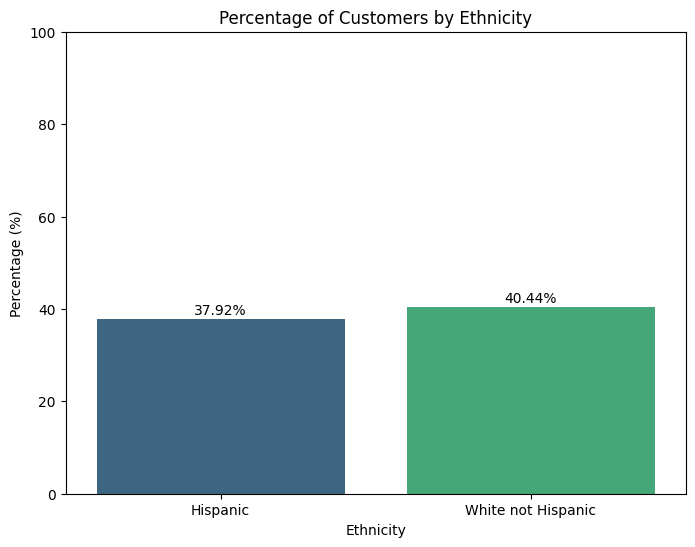

In [ ]:
total_customers = len(df_cleaned)
hispanic_percentage = len(df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']) / total_customers * 100
white_non_hispanic_percentage = len(df_cleaned[df_cleaned['Ethnicity'] == 'White not Hispanic']) / total_customers * 100

print(f"Percentage of Hispanic customers: {hispanic_percentage:.2f}%")
print(f"Percentage of White non-Hispanic customers: {white_non_hispanic_percentage:.2f}%")


# Calculate percentages
total_customers = len(df_cleaned)
hispanic_percentage = (len(df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']) / total_customers) * 100
white_non_hispanic_percentage = (len(df_cleaned[df_cleaned['Ethnicity'] == 'White not Hispanic']) / total_customers) * 100

# Data for visualization
ethnicity_percentages = {
    'Hispanic': hispanic_percentage,
    'White not Hispanic': white_non_hispanic_percentage
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(ethnicity_percentages.keys()), y=list(ethnicity_percentages.values()), palette='viridis')
plt.title('Percentage of Customers by Ethnicity')
plt.ylabel('Percentage (%)')
plt.xlabel('Ethnicity')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Add percentage labels on top of the bars
for i, value in enumerate(ethnicity_percentages.values()):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.show()

###ii. Compare expenditures between Hispanic and White non-Hispanic consumers:



Total Expenditure (Hispanic): 4154254
Total Expenditure (White Non-Hispanic): 9903377


<ipython-input-15-62a922ea6390>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(expenditures.keys()), y=list(expenditures.values()), palette='viridis')


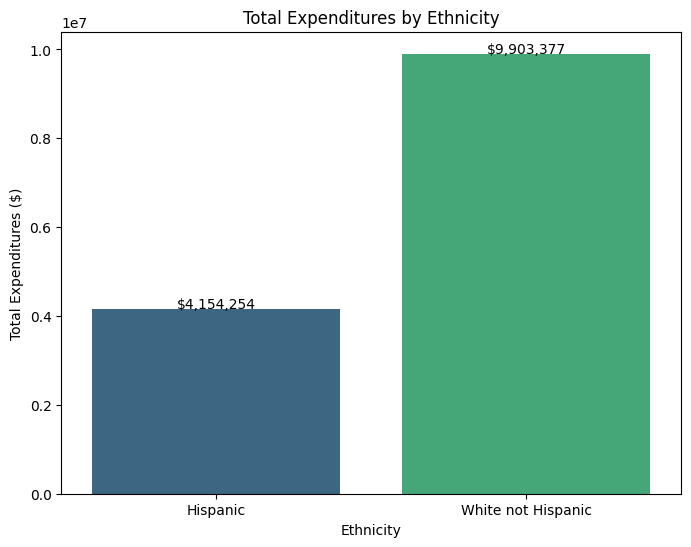

In [ ]:
# Calculate total expenditures
total_exp_hispanic = df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']['Expenditures'].sum()
total_exp_white_non_hispanic = df_cleaned[df_cleaned['Ethnicity'] == 'White not Hispanic']['Expenditures'].sum()
print("Total Expenditure (Hispanic):", total_exp_hispanic)
print("Total Expenditure (White Non-Hispanic):", total_exp_white_non_hispanic)

# Data for visualization
expenditures = {
    'Hispanic': total_exp_hispanic,
    'White not Hispanic': total_exp_white_non_hispanic
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(expenditures.keys()), y=list(expenditures.values()), palette='viridis')
plt.title('Total Expenditures by Ethnicity')
plt.ylabel('Total Expenditures ($)')
plt.xlabel('Ethnicity')

# Add value labels on top of the bars
for i, value in enumerate(expenditures.values()):
    plt.text(i, value + 10000, f'${value:,}', ha='center')  # Adjust the offset (10000) as needed

plt.show()

Average expenditures by age cohort (Hispanic and White not Hispanic only):
 Age Cohort  Avg Expenditure Hispanic  Avg Expenditure White not Hispanic
  0-5 years               1393.204545                         1420.947368
13-17 years               3955.281553                         3904.358209
18-21 years              10006.077922                        10133.057971
22-50 years              40924.116279                        40187.624060
  51+ years              55585.000000                        52670.424242
 6-12 years               2312.186813                         2052.260870


<Figure size 1000x600 with 0 Axes>

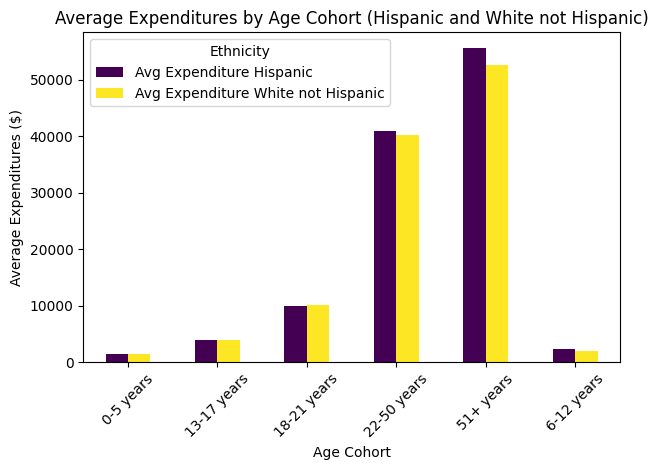

In [ ]:
# Filter the data to include only Hispanic and White not Hispanic consumers
filtered_df = df_cleaned[df_cleaned['Ethnicity'].isin(['Hispanic', 'White not Hispanic'])]

# Group by Age Cohort and Ethnicity, then calculate the mean (average) expenditures
avg_exp_by_age_cohort = filtered_df.groupby(['Age Cohort', 'Ethnicity'], as_index=False)['Expenditures'].mean()

# Pivot the table to have Hispanic and White not Hispanic as columns
avg_exp_by_age_cohort = avg_exp_by_age_cohort.pivot(index='Age Cohort', columns='Ethnicity', values='Expenditures')

# Rename columns for clarity
avg_exp_by_age_cohort = avg_exp_by_age_cohort.rename(columns={
    'Hispanic': 'Avg Expenditure Hispanic',
    'White not Hispanic': 'Avg Expenditure White not Hispanic'
})

# Reset the index to make Age Cohort a column (not an index)
avg_exp_by_age_cohort = avg_exp_by_age_cohort.reset_index()

print("Average expenditures by age cohort (Hispanic and White not Hispanic only):")
print(avg_exp_by_age_cohort.to_string(index=False))  # Remove the index when printing

# Plot the data
plt.figure(figsize=(10, 6))
avg_exp_by_age_cohort.plot(x='Age Cohort', y=['Avg Expenditure Hispanic', 'Avg Expenditure White not Hispanic'], kind='bar', colormap='viridis')
plt.title('Average Expenditures by Age Cohort (Hispanic and White not Hispanic)')
plt.ylabel('Average Expenditures ($)')
plt.xlabel('Age Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### iii. Assess if there is evidence of racial bias in the allocation of expenditure

In [ ]:
# Calculate average expenditures
avg_exp_hispanic = df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']['Expenditures'].mean()
avg_exp_white_non_hispanic = df_cleaned[df_cleaned['Ethnicity'] == 'White not Hispanic']['Expenditures'].mean()

print(f"Average expenditure for Hispanic consumers: ${avg_exp_hispanic:,.2f}")
print(f"Average expenditure for White non-Hispanic consumers: ${avg_exp_white_non_hispanic:,.2f}")

Average expenditure for Hispanic consumers: $8,964.55
Average expenditure for White non-Hispanic consumers: $19,152.27


In [ ]:
from scipy.stats import ttest_ind

# Perform a t-test to compare expenditures
hispanic_expenditures = df_cleaned[df_cleaned['Ethnicity'] == 'Hispanic']['Expenditures']
white_non_hispanic_expenditures = df_cleaned[df_cleaned['Ethnicity'] == 'White not Hispanic']['Expenditures']

t_stat, p_value = ttest_ind(hispanic_expenditures, white_non_hispanic_expenditures, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in expenditures is statistically significant (p < 0.05).")
else:
    print("The difference in expenditures is not statistically significant (p >= 0.05).")

T-statistic: -8.68, P-value: 0.0000
The difference in expenditures is statistically significant (p < 0.05).


In [ ]:
if avg_exp_hispanic < avg_exp_white_non_hispanic and p_value < 0.05:
    print("There is evidence of racial bias, with White non-Hispanic consumers receiving significantly higher expenditures.")
elif avg_exp_hispanic > avg_exp_white_non_hispanic and p_value < 0.05:
    print("There is evidence of racial bias, with Hispanic consumers receiving significantly higher expenditures.")
else:
    print("There is no significant evidence of racial bias in the allocation of expenditures.")

There is evidence of racial bias, with White non-Hispanic consumers receiving significantly higher expenditures.
